In [6]:
import torch 

import os
from torch.autograd import Variable

import numpy as np
import torch.optim as optim
#from kcrf.estimator import simple_estimator as np_simple_est
import time 
import matplotlib.pyplot as plt
import matplotlib 
import matplotlib.cm as cm
import matplotlib.animation as animation
import pickle
%matplotlib inline
import seaborn as sns
sns.set(context='paper', style='whitegrid', font_scale=1.75)
sns.set_style("whitegrid", {'axes.grid' : False})
from copy import deepcopy
from matplotlib.legend_handler import HandlerPatch
import matplotlib.patches as mpatches
from matplotlib import pyplot

/nfs/ghome/live/michaela/anaconda3/envs/test/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


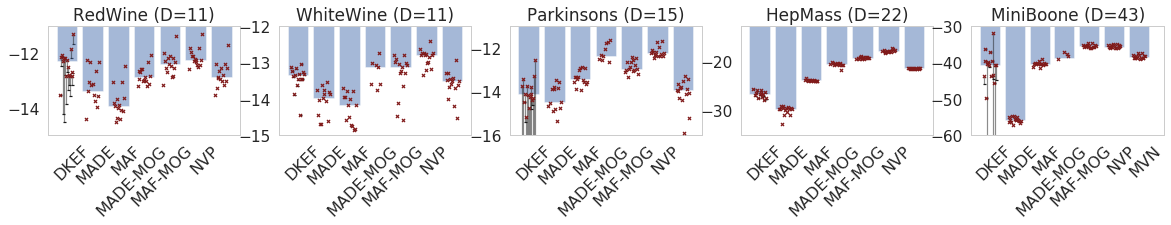

In [9]:
f = np.load("dkef_and_flows.npz")
all_lls = f["arr_0"]
all_biases = f["arr_1"]
dnames = ["redwine", "whitewine", "parkinsons", "hepmass", "miniboone"]
data_names = ["RedWine (D=11)", "WhiteWine (D=11)", "Parkinsons (D=15)", "HepMass (D=22)", "MiniBoone (D=43)"]
fig, axes = plt.subplots(1, len(dnames), figsize=(4 * len(dnames), 2),  squeeze=False, sharex=True)
loglik_limits = dict(redwine=-np.inf, whitewine=-50, parkinsons=-3500, hepmass=-5000, miniboone=-600)
ylims = dict(redwine=(-17,-11), whitewine=(-17.5,-12), parkinsons=(-25.5,-11), hepmass=(-35,-13), miniboone=(-60,-30))
ylims = dict(redwine=(-15,-11), whitewine=(-15,-12), parkinsons=(-16,-11), hepmass=(-35,-13), miniboone=(-60,-30))
#ylims = dict(redwine=(-15,-11), whitewine=(-15.5,-12), parkinsons=(-16,-11), hepmass=(-32,-13), miniboone=(-45,-34))
score_ylims = dict(redwine=(-60,50), whitewine=(-60,20), parkinsons=(-500,200), hepmass=(-2300,100), miniboone=(-2800,100))
display_names = ["DKEF","MADE", "MAF", "MADE-MOG", "MAF-MOG", "NVP", "MVN"]
ylims = dict(redwine=(-15,-11), whitewine=(-15,-12), parkinsons=(-16,-11), hepmass=(-35,-13), miniboone=(-60,-30))
loglik_limits = dict(redwine=-np.inf, whitewine=-50, parkinsons=-20, hepmass=-30, miniboone=-60)
for di, dname in enumerate(dnames):
    ############ log likelihoods ############
    ax = axes[0,di]
    jitter = 0.25
    lls = all_lls[di]
    dkef_bias = all_biases[di]
    pos = np.arange(lls.shape[0]) - 1
    x = np.repeat(pos[None,:], [lls.shape[1]], axis=0)#.flatten()
    x = x + np.linspace(-jitter, jitter, num=lls.shape[1])[:, np.newaxis]
    x = x.flatten()
    #x = x + np.random.uniform(-0.15, 0.15, *x.shape)
    ax.scatter(x, lls.T.flatten(), 10, color=(.5,.1,.1), marker="x", zorder=3)
    pos = np.arange(lls.shape[0]) - 1
    ax.bar(pos, np.nanmedian(lls, axis=1), alpha=.5, )# yerr=np.nanstd(fssd2s, axis=1)
    x = np.repeat(pos[None,:], [lls.shape[1]], axis=0)#.flatten()
    x = x + np.linspace(-jitter, jitter, num=lls.shape[1])[:, np.newaxis]
    dkef_idx=0
    lls_dkef = lls[dkef_idx,:]
    ax.plot(np.tile(x[:,dkef_idx], [2,1]), np.c_[lls_dkef, lls_dkef-dkef_bias].T, "k", alpha=0.5)
    ax.scatter(x[:,dkef_idx], lls_dkef-dkef_bias.T, 9, "k", marker = "_", alpha=1, )
    ax.set_ylim(*ylims[dname])
    ax.set_title(data_names[di])
    ax.set_xticks(range(7))
    ax.set_xticklabels(display_names, rotation=45, ha="right", position=(0.0,0.01),
                      fontsize=16)

In [10]:
lls = all_lls[di]

['redwine', 'whitewine', 'parkinsons', 'hepmass', 'miniboone']